# Implementação de Sistemas de Controle Automático de Velocidade do Limpador e Modos de Faróis Usando Lógica Fuzzy

In [92]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

## A) Velocidade Automática do Limpador

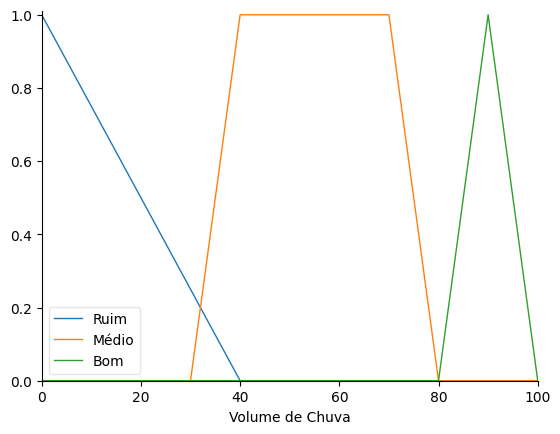

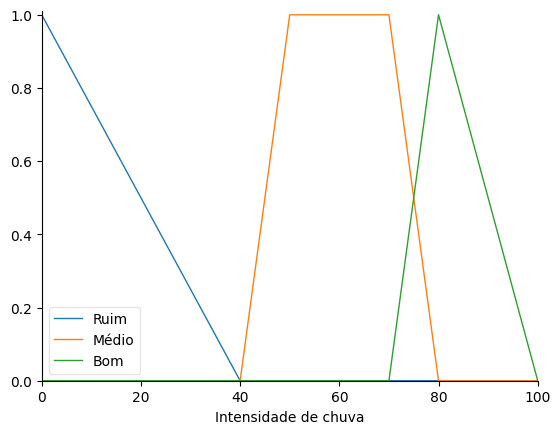

In [93]:
import numpy as np
import matplotlib.pyplot as plt

volume_rain=ctrl.Antecedent(np.arange(0,101,1),'Volume de Chuva') # até 100mm/h
volume_rain['Ruim']=fuzzy.trimf(volume_rain.universe,[0,0,40])
volume_rain['Médio']=fuzzy.trapmf(volume_rain.universe,[30,40,70,80])
volume_rain['Bom']=fuzzy.trimf(volume_rain.universe,[80,90,100])

rain_intensity=ctrl.Antecedent(np.arange(0,101,1),'Intensidade de chuva') # Chuva associada a velocidade do vento (grau relativo de 0 a 100)
rain_intensity['Ruim']=fuzzy.trimf(rain_intensity.universe,[0,0,40])
rain_intensity['Médio']=fuzzy.trapmf(rain_intensity.universe,[40,50,70,80])
rain_intensity['Bom']=fuzzy.trimf(rain_intensity.universe,[70,80,100])

volume_rain.view()
plt.ylabel('')

rain_intensity.view()
plt.ylabel('')
plt.show()

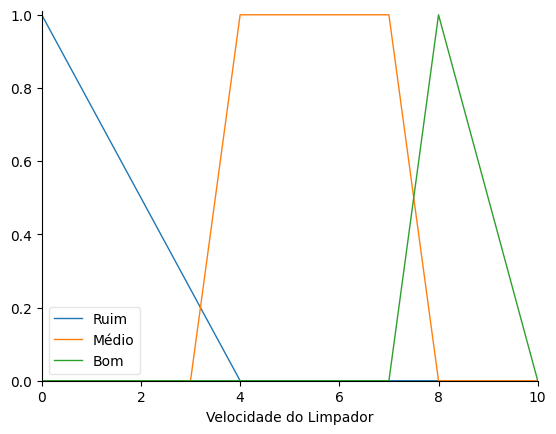

In [94]:
wiper_speed=ctrl.Consequent(np.arange(0,11,1),'Velocidade do Limpador')
wiper_speed['Ruim']=fuzzy.trimf(wiper_speed.universe,[0,0,4])
wiper_speed['Médio']=fuzzy.trapmf(wiper_speed.universe,[3,4,7,8])
wiper_speed['Bom']=fuzzy.trimf(wiper_speed.universe,[7,8,10])

wiper_speed.view()
plt.ylabel('')
plt.show()

O valor automatizado da tensão para a velocidade do limpador é 6.2727272727272725


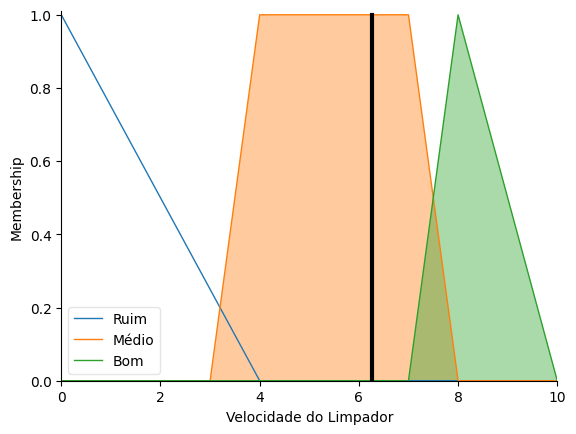

In [95]:
rule1 = ctrl.Rule(volume_rain['Ruim'] | rain_intensity['Ruim'], wiper_speed['Ruim'])
rule2 = ctrl.Rule(volume_rain['Médio'] | rain_intensity['Médio'], wiper_speed['Médio'])
rule3 = ctrl.Rule(volume_rain['Bom'] | rain_intensity['Bom'], wiper_speed['Bom'])

rules=[rule1,rule2,rule3]
tipping=ctrl.ControlSystem(rules)
Tip=ctrl.ControlSystemSimulation(tipping)

Tip.input['Volume de Chuva'] = 50
Tip.input['Intensidade de chuva'] = 80
Tip.compute()

print('O valor automatizado da tensão para a velocidade do limpador é', Tip.output['Velocidade do Limpador'])

wiper_speed.view(sim=Tip)

## B) Modos de Farol

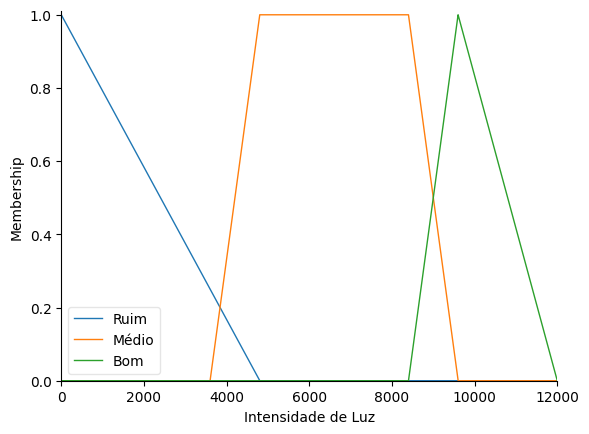

In [96]:
lightintensity=ctrl.Antecedent(np.arange(0,12001,1), 'Intensidade de Luz')

lightintensity['Ruim']=fuzzy.trimf(lightintensity.universe,[0,0,4800])
lightintensity['Médio']=fuzzy.trapmf(lightintensity.universe,[3600,4800,8400,9600])
lightintensity['Bom']=fuzzy.trimf(lightintensity.universe,[8400,9600,12000])

lightintensity.view()

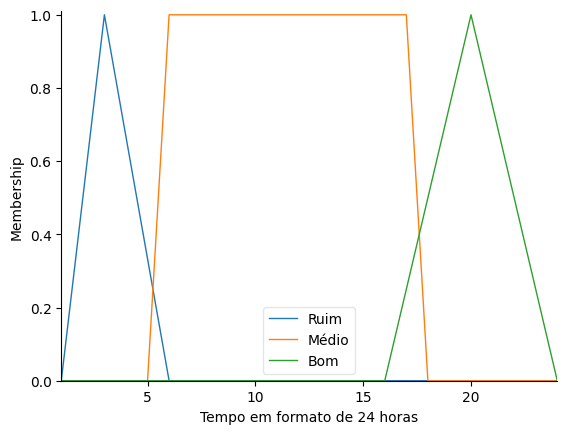

In [97]:
headlight=ctrl.Antecedent(np.arange(1,25,1),'Tempo em formato de 24 horas')

headlight['Ruim']=fuzzy.trimf(headlight.universe,[1,3,6]) # Manhã
headlight['Médio']=fuzzy.trapmf(headlight.universe,[5,6,17,18]) # Dia
headlight['Bom']=fuzzy.trimf(headlight.universe,[16,20,24]) # Noite

headlight.view()

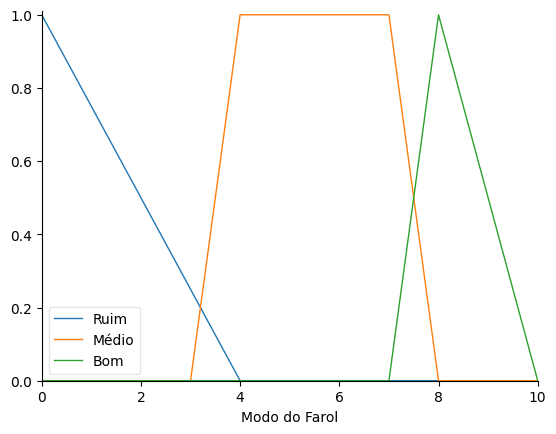

In [98]:
switch=ctrl.Consequent(np.arange(0,11,1),'Modo do Farol')

switch['Ruim']=fuzzy.trimf(switch.universe,[0,0,4])
switch['Médio']=fuzzy.trapmf(switch.universe,[3,4,7,8])
switch['Bom']=fuzzy.trimf(switch.universe,[7,8,10])

switch.view()
plt.ylabel('')
plt.show()

In [99]:
from datetime import datetime
now = datetime.now()
print('A hora (no formato de 24 horas) é', now.hour)

A hora (no formato de 24 horas) é 23


O valor automatizado do modo de comutação é 1.6538461538461537


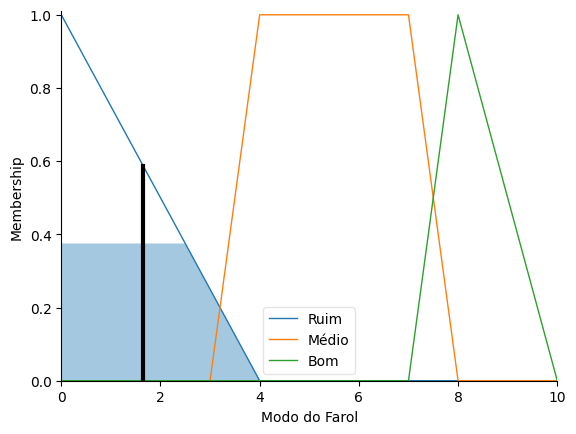

In [100]:
rule1 = ctrl.Rule(lightintensity['Ruim'] | headlight['Ruim'], switch['Ruim'])
rule2 = ctrl.Rule(lightintensity['Médio'] | headlight['Médio'], switch['Médio'])
rule3 = ctrl.Rule(lightintensity['Bom'] | headlight['Bom'], switch['Bom'])

rules=[rule1,rule2,rule3]
tipping=ctrl.ControlSystem(rules)
tip=ctrl.ControlSystemSimulation(tipping)

tip.input['Intensidade de Luz']= 3000
tip.input['Tempo em formato de 24 horas']= 5
tip.compute()

print('O valor automatizado do modo de comutação é', tip.output['Modo do Farol'])

switch.view(sim=tip)